### Neuron Tutorial - Modeling Exercises Class 3 - part 3

## March 14th, 2024


In this part, we will learn how to build an **artificial neuron model**, instead of using the experimentally measured morphology as we did in part1. We can build a multi-compartmental model by constructing **Sections** and **connecting** them.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

# we build a three-compartment model: one soma + two dendrites
soma = h.Section(name='soma')
dends = [h.Section(name=f'dend{i+1}') for i in range(2)]

We visualize what is inside of dends using psection command: 

In [2]:
print(dends)
dends[0].psection()

[dend1, dend2]


{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'dend1',
 'hoc_internal_name': '__nrnsec_0x1482b0060',
 'cell': None}

**Step 1:** Specify their **morphological properties**.

In [3]:
soma.L = 4
soma.diam = 8

for d in dends:
    d.L = 600
    d.diam = 5
    d.nseg = 1 # isopotential sections

**Step 2:** **Connect** the soma and dendrites **electrically**.

In [4]:
for d in dends:
    d.connect(soma(1), 0)

In [5]:
h.topology()


|-|       soma(0-1)
   `|       dend1(0-1)
   `|       dend2(0-1)



1.0

**Step 3:** Include passive **mechanisms** for the dendrites

In [6]:
for s in h.allsec():
    s.insert('pas')
    s.g_pas = 0.5e-4

h.v_init = soma.e_pas # we set the initial voltage to the reversal potential of the passive membrane

**Step 4:** Add **point processes**. In this case we will add a current clamp on one of the dendrites

In [7]:
ic = h.IClamp(dends[0](0.5))
ic.amp = 0.2 # 200 pA
ic.delay = 10
ic.dur = 150

**Step 5**: Define the functions for **running**, **recording** and **plotting** this simulation: 

In [8]:
def record_and_run(tstop=250, dt=0.1):
    vrec = h.Vector()
    trec = h.Vector()
    
    vrec.record(soma(0.5)._ref_v, dt)
    trec.record(h._ref_t, dt)
    
    h.tstop = tstop
    h.init()
    h.run()

    return vrec.c(), trec.c()
    
def run_and_plot(tstop=250, ax=None):
    v, t = record_and_run(tstop=tstop)
    
    if ax is None:
        _, ax = plt.subplots()
    ax.plot(t, v)

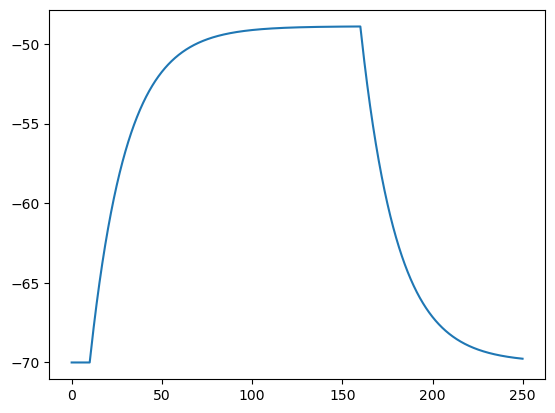

In [9]:
run_and_plot()

Let's change the coupling of the dendrite and soma. We first measure what is the resistance between the soma and the first dendrite.

In [10]:
# https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html?highlight=ri#ri
# Return the resistance (in megohms) between the center of the segment section(x) and its parent segment.

dends[0](0.5).ri()

5.408721586034971

We can change the result by changing the axial resistance of the dendrite.

Now the resistance is 54.0872 MΩ.


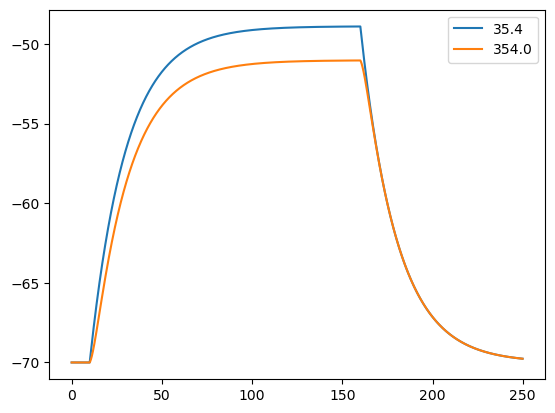

In [9]:
_, ax = plt.subplots()

v, t = record_and_run()
ax.plot(t, v, label=f'{dends[0].Ra}')

dends[0].Ra = dends[1].Ra*10
print(f'Now the resistance is {dends[0](0.5).ri():.4f} MΩ.')

v, t = record_and_run()
ax.plot(t, v, label=f'{dends[0].Ra}')
_ = plt.legend()